# 01 — Exploratory Data Analysis (EDA): LendingClub (2007–2015)
#
# **Objective**
# Explore the LendingClub loan dataset to understand:
# - dataset structure, types, missingness, and duplicates
# - distributions and outliers of key numeric variables
# - loan status composition and class imbalance
# - relationships between borrower/loan characteristics and default outcomes
# - basic time trends of defaults over issuance time
#
# **Important Note**
# This notebook uses a *proxy default flag* for EDA only:
# `default_flag = 1 if loan_status is Charged Off or Default else 0`.
# The formal modeling target (**early_default**) is defined later in Notebook 02.


In [6]:
import pandas as pd 
import numpy as np 

# 1) Load Raw Dataset
# Load the loan-level LendingClub dataset. We use `low_memory=False` to reduce dtype inference issues.


In [7]:
df = pd.read_csv (
    "../data/raw/lendingclub/loan.csv",
    low_memory=False
)

# 2) Dataset Overview
# We inspect:
# - shape (#rows, #columns)
# - head (sample rows)
# - schema / dtypes
# - summary stats for numeric fields
# - duplicates
# - missing values by column (to guide cleaning)

In [8]:
print("Shape of dataset:", df.shape)

print("First 5 rows: ")
display(df.head())

print ("Info of Dataset: ")
df.info()

print("Descriptive statistics: ")
display(df.describe())

print("Number of Duplicate rows:", df.duplicated().sum())

print("Missing values per column:")
display(df.isnull().sum().sort_values(ascending=False))




Shape of dataset: (2260668, 145)
First 5 rows: 


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,2500,2500,2500.0,36 months,13.56,84.92,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,30000,30000,30000.0,60 months,18.94,777.23,D,D2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,5000,5000,5000.0,36 months,17.97,180.69,D,D1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,4000,4000,4000.0,36 months,18.94,146.51,D,D2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,30000,30000,30000.0,60 months,16.14,731.78,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


Info of Dataset: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260668 entries, 0 to 2260667
Columns: 145 entries, id to settlement_term
dtypes: float64(105), int64(4), object(36)
memory usage: 2.4+ GB
Descriptive statistics: 


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,url,dti,...,deferral_term,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,settlement_amount,settlement_percentage,settlement_term
count,0.0,0.0,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260664e+06,0.0,2.258957e+06,...,10613.0,10613.000000,10613.0,10613.000000,8426.000000,10613.000000,10613.000000,33056.000000,33056.000000,33056.000000
mean,NaN,NaN,1.504693e+04,1.504166e+04,1.502344e+04,1.309291e+01,4.458076e+02,7.799243e+04,NaN,1.882420e+01,...,3.0,155.006696,3.0,13.686422,454.840802,11628.036442,193.606331,5030.606922,47.775600,13.148596
std,NaN,NaN,9.190245e+03,9.188413e+03,9.192332e+03,4.832114e+00,2.671737e+02,1.126962e+05,NaN,1.418333e+01,...,0.0,129.113137,0.0,9.728138,375.830737,7615.161123,198.694368,3692.027842,7.336379,8.192319
min,NaN,NaN,5.000000e+02,5.000000e+02,0.000000e+00,5.310000e+00,4.930000e+00,0.000000e+00,NaN,-1.000000e+00,...,3.0,0.640000,3.0,0.000000,1.920000,55.730000,0.010000,44.210000,0.200000,0.000000
25%,NaN,NaN,8.000000e+03,8.000000e+03,8.000000e+03,9.490000e+00,2.516500e+02,4.600000e+04,NaN,1.189000e+01,...,3.0,59.370000,3.0,5.000000,174.967500,5628.730000,43.780000,2227.000000,45.000000,6.000000
50%,NaN,NaN,1.290000e+04,1.287500e+04,1.280000e+04,1.262000e+01,3.779900e+02,6.500000e+04,NaN,1.784000e+01,...,3.0,119.040000,3.0,15.000000,352.605000,10044.220000,132.890000,4172.855000,45.000000,14.000000
75%,NaN,NaN,2.000000e+04,2.000000e+04,2.000000e+04,1.599000e+01,5.933200e+02,9.300000e+04,NaN,2.449000e+01,...,3.0,213.260000,3.0,22.000000,622.792500,16114.940000,284.180000,6870.782500,50.000000,18.000000
max,NaN,NaN,4.000000e+04,4.000000e+04,4.000000e+04,3.099000e+01,1.719830e+03,1.100000e+08,NaN,9.990000e+02,...,3.0,943.940000,3.0,37.000000,2680.890000,40306.410000,1407.860000,33601.000000,521.350000,181.000000


Number of Duplicate rows: 0
Missing values per column:


id                                            2260668
member_id                                     2260668
url                                           2260668
orig_projected_additional_accrued_interest    2252242
hardship_amount                               2250055
                                               ...   
total_rec_int                                       0
collection_recovery_fee                             0
hardship_flag                                       0
disbursement_method                                 0
debt_settlement_flag                                0
Length: 145, dtype: int64

# 3) Target-Related Overview: Loan Status
# `loan_status` contains the outcome categories (e.g., Fully Paid, Current, Charged Off).
# We will use it in EDA to understand class imbalance and risk segmentation.


In [9]:
df['loan_status'].value_counts()


loan_status
Fully Paid                                             1041952
Current                                                 919695
Charged Off                                             261655
Late (31-120 days)                                       21897
In Grace Period                                           8952
Late (16-30 days)                                         3737
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                     31
Name: count, dtype: int64

# 4) Create a Smaller Subset for Faster EDA
# The raw dataset is very large (millions of rows, 100+ columns).
# For EDA, we focus on a subset of variables that are:
# - economically meaningful
# - commonly used in credit-risk models
# - mostly available at origination (helps avoid leakage thinking during EDA)
#
# Selected categories:
# - Loan attributes: loan_amnt, funded_amnt, term, int_rate, installment
# - Borrower capacity: annual_inc, dti
# - Risk segment: grade, sub_grade
# - Borrower profile: emp_length, home_ownership, verification_status
# - Purpose & geography: purpose, addr_state
# - Time anchor: issue_d


In [10]:
# Relevant columns for the Analysis
relevant_cols =[ 
    'loan_status', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 
    'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc', 
    'verification_status', 'purpose', 'dti', 'addr_state', 'issue_d'
]

df_eda = df[relevant_cols].copy()

print("Shape of subset dataset for EDA:", df_eda.shape)
display(df_eda.head())




Shape of subset dataset for EDA: (2260668, 17)


,loan_status,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,purpose,dti,addr_state,issue_d
0,Current,2500,2500,2500.0,36 months,13.56,84.92,C,C1,10+ years,RENT,55000.0,Not Verified,debt_consolidation,18.24,NY,Dec-2018
1,Current,30000,30000,30000.0,60 months,18.94,777.23,D,D2,10+ years,MORTGAGE,90000.0,Source Verified,debt_consolidation,26.52,LA,Dec-2018
2,Current,5000,5000,5000.0,36 months,17.97,180.69,D,D1,6 years,MORTGAGE,59280.0,Source Verified,debt_consolidation,10.51,MI,Dec-2018
3,Current,4000,4000,4000.0,36 months,18.94,146.51,D,D2,10+ years,MORTGAGE,92000.0,Source Verified,debt_consolidation,16.74,WA,Dec-2018
4,Current,30000,30000,30000.0,60 months,16.14,731.78,C,C4,10+ years,MORTGAGE,57250.0,Not Verified,debt_consolidation,26.35,MD,Dec-2018


# 5) Univariate Analysis — Numeric Variables
# We visualize distributions and potential outliers using:
# - Histograms (shape/skewness)
# - Boxplots (outliers / spread)


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

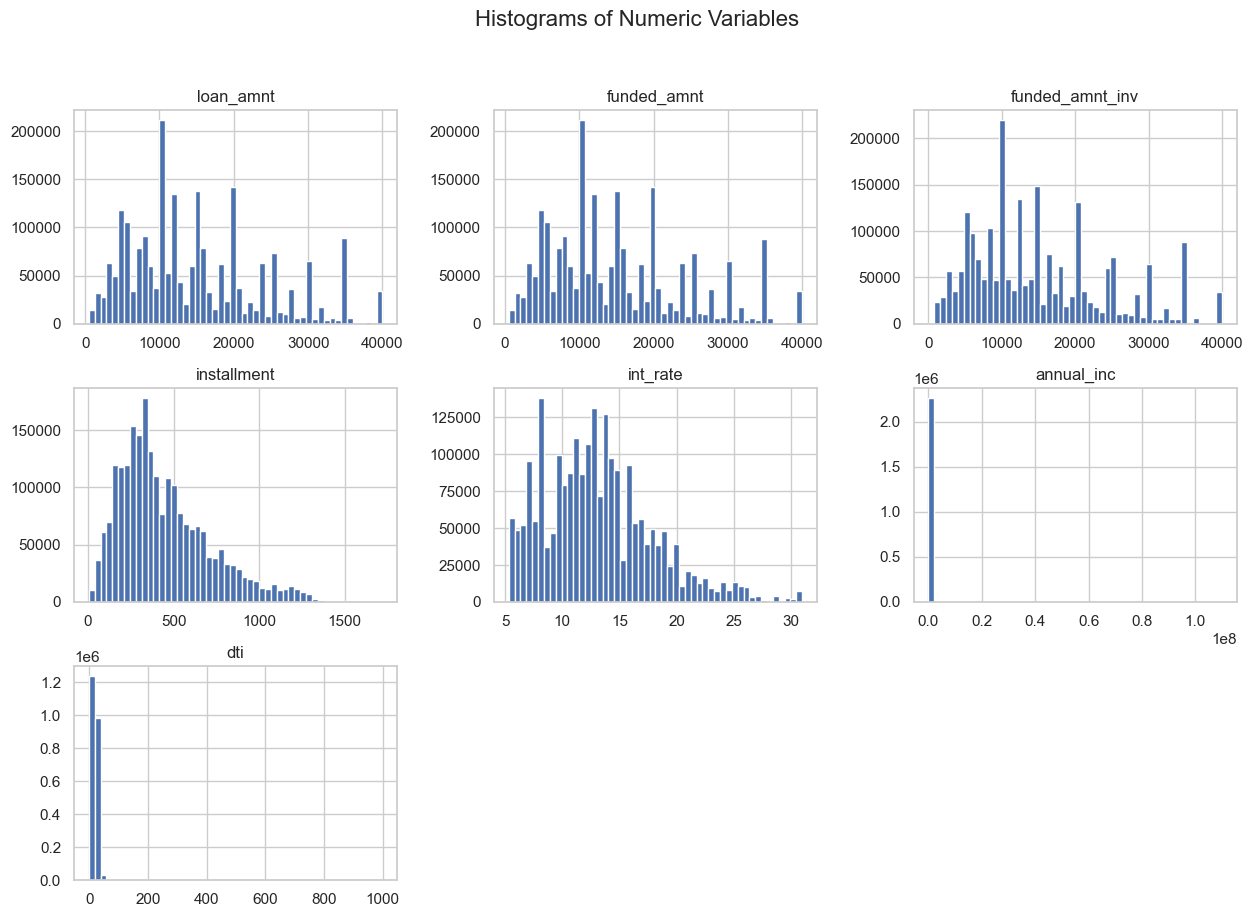

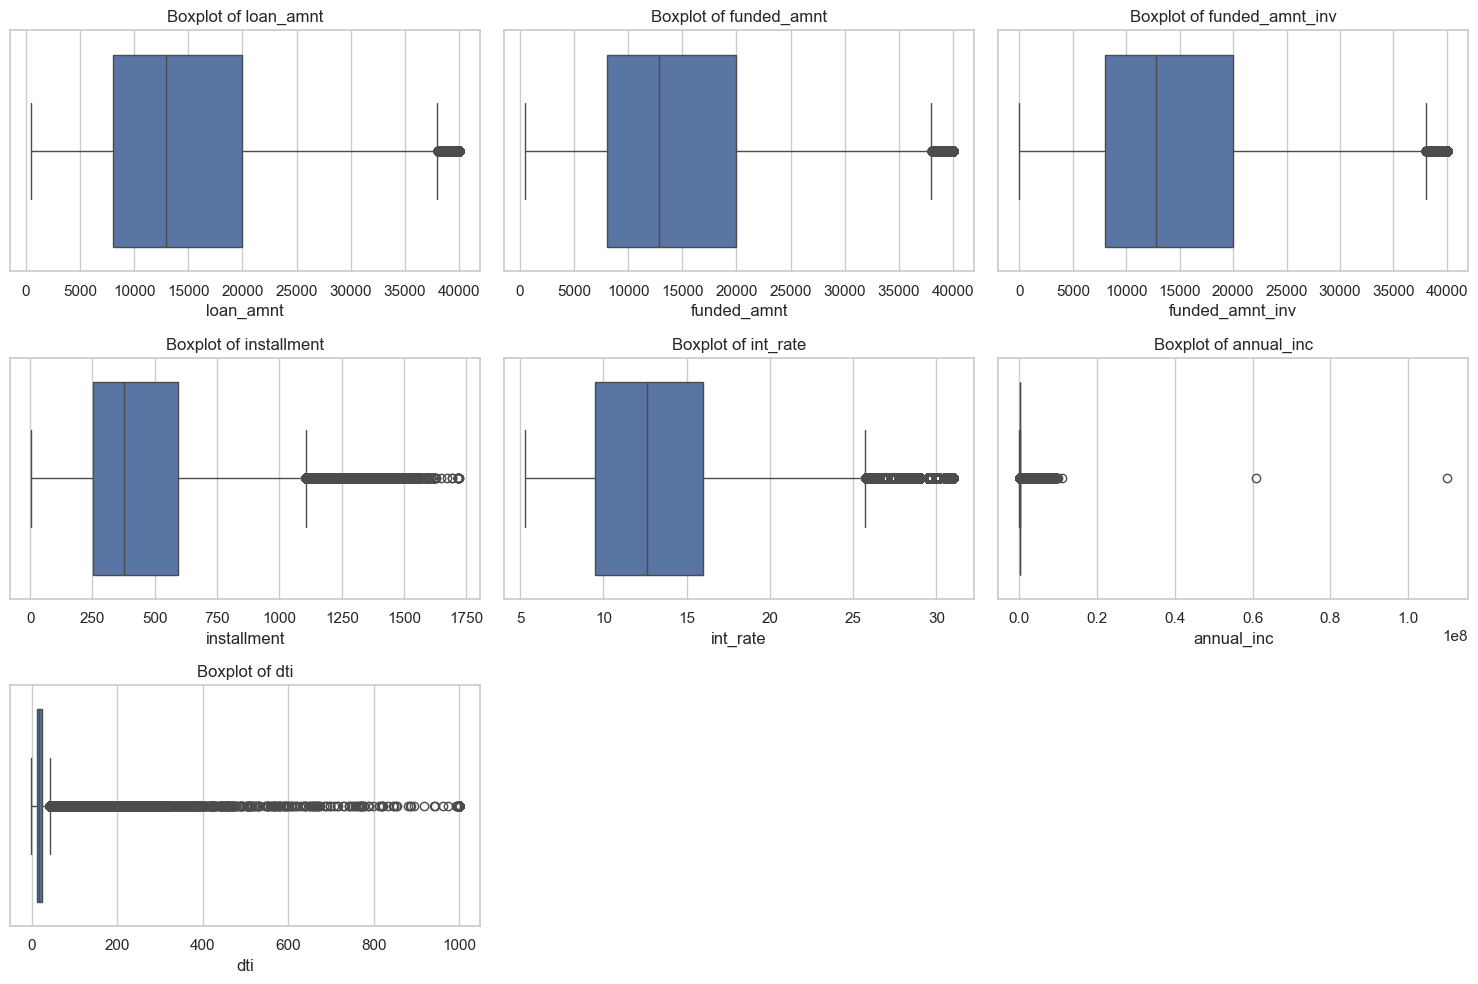

In [12]:
# Set global style
sns.set(style="whitegrid")

numeric_cols = ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'installment', 'int_rate', 'annual_inc', 'dti']

# Histograms
df_eda[numeric_cols].hist(bins=50, figsize=(15,10), layout=(3,3))
plt.suptitle("Histograms of Numeric Variables", fontsize=16)
plt.show()

# Boxplots 
plt.figure(figsize=(15,10))
for i, col in enumerate(numeric_cols):
    plt.subplot(3,3,i+1)
    sns.boxplot(x=df_eda[col])
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()

# 6) Univariate Analysis — Categorical Variables
# Count plots show how loans are distributed across categories.
# (For high-cardinality fields like `addr_state`, we will later plot only top categories.)


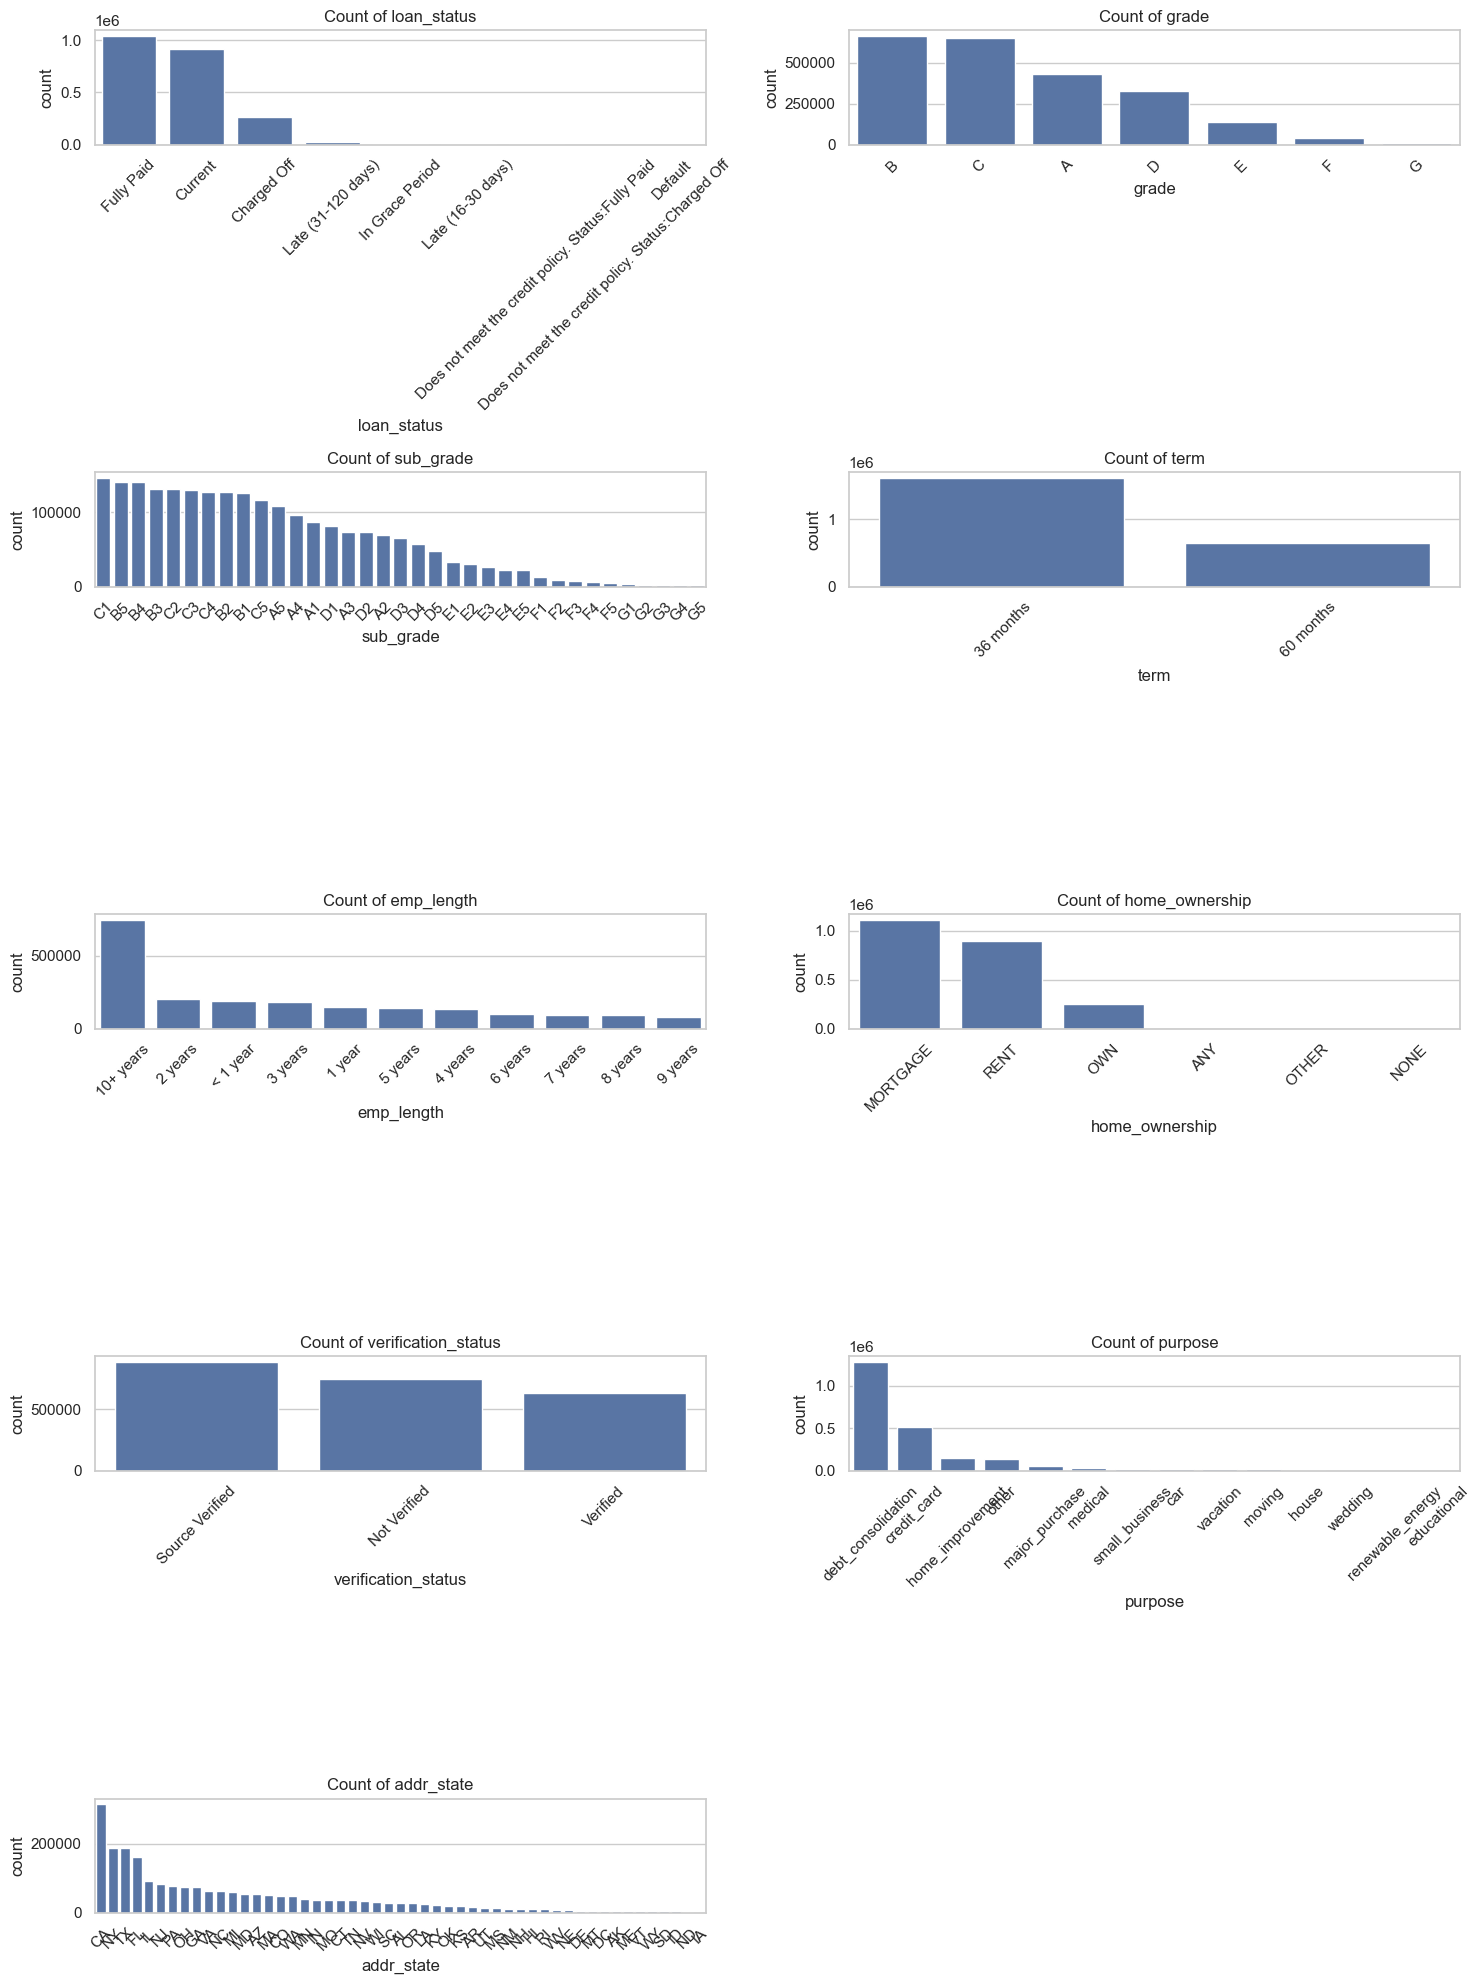

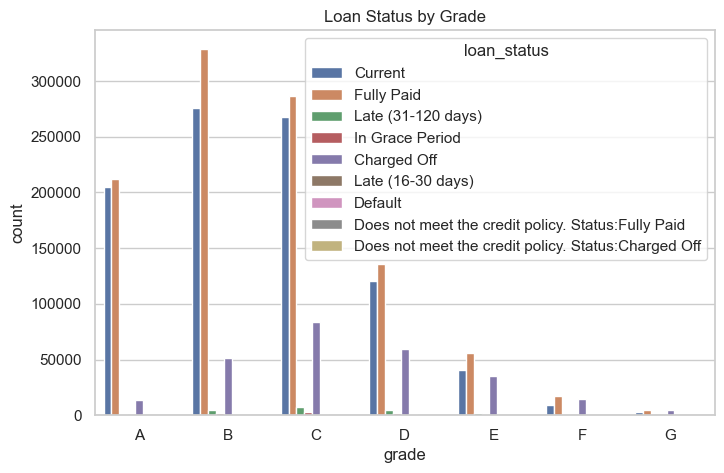

In [13]:
categorical_cols = ['loan_status', 'grade', 'sub_grade', 'term', 'emp_length', 
                    'home_ownership', 'verification_status', 'purpose', 'addr_state']

# Count plots for each categorical column
plt.figure(figsize=(15,20))
for i, col in enumerate(categorical_cols):
    plt.subplot(5,2,i+1)
    sns.countplot(data=df_eda, x=col, order=df_eda[col].value_counts().index)
    plt.xticks(rotation=45)
    plt.title(f"Count of {col}")
plt.tight_layout()
plt.show()

# Loan Status by Grade (risk segmentation)
plt.figure(figsize=(8,5))
sns.countplot(data=df_eda, x='grade', hue='loan_status', order=sorted(df_eda['grade'].unique()))
plt.title("Loan Status by Grade")
plt.show()


# 7) Time Trends — Defaults Over Time
# We examine how default volume changes over issuance time using `issue_d`.
# This helps detect macro/regime effects and portfolio drift.


C:\Users\bdgsg\AppData\Local\Temp\ipykernel_10376\1628198684.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_eda['issue_d'] = pd.to_datetime(df_eda['issue_d'], errors='coerce')


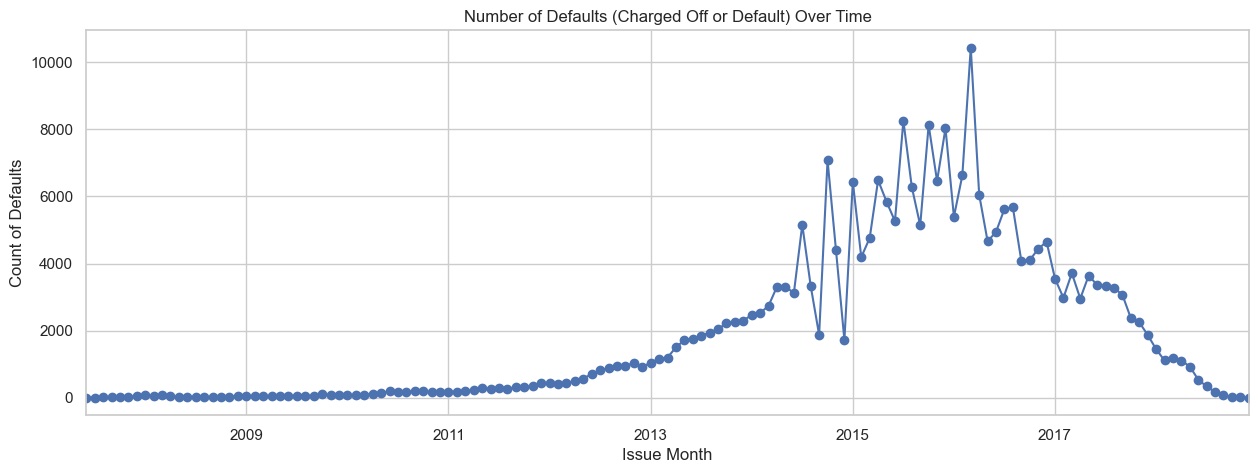

In [14]:
# Parse issue date
df_eda['issue_d'] = pd.to_datetime(df_eda['issue_d'], errors='coerce')

# Monthly defaults (Charged Off + Default)
df_eda['issue_month'] = df_eda['issue_d'].dt.to_period('M')
monthly_defaults = df_eda[df_eda['loan_status'].str.contains("Default|Charged Off", na=False)].groupby('issue_month').size()

plt.figure(figsize=(15,5))
monthly_defaults.plot(kind='line', marker='o')
plt.title("Number of Defaults (Charged Off or Default) Over Time")
plt.xlabel("Issue Month")
plt.ylabel("Count of Defaults")
plt.show()


# 8) Correlation Analysis (Numeric)
# Correlation helps identify strong linear relationships among numeric variables
# (e.g., funded amount vs loan amount, installment vs amount/rate).
# Since `loan_status` is categorical, we correlate numeric variables only.


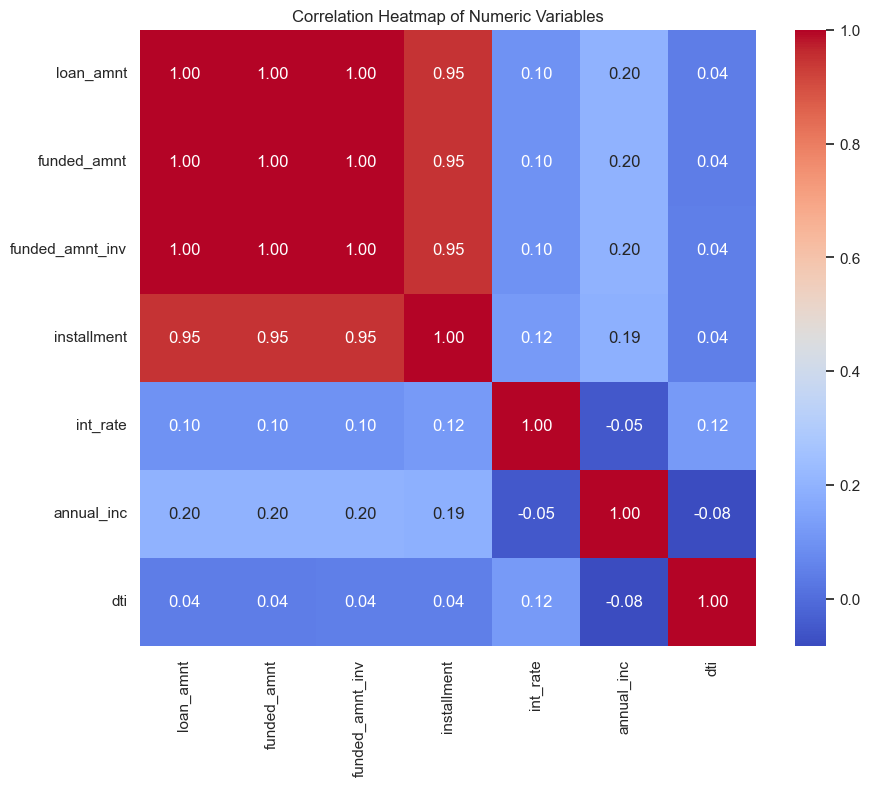

In [15]:
corr_matrix = df_eda[numeric_cols].corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Heatmap of Numeric Variables")
plt.show()


# 9) Pairwise Relationships (Sampled)
# Pairplots can be slow on large datasets, so we sample for performance.


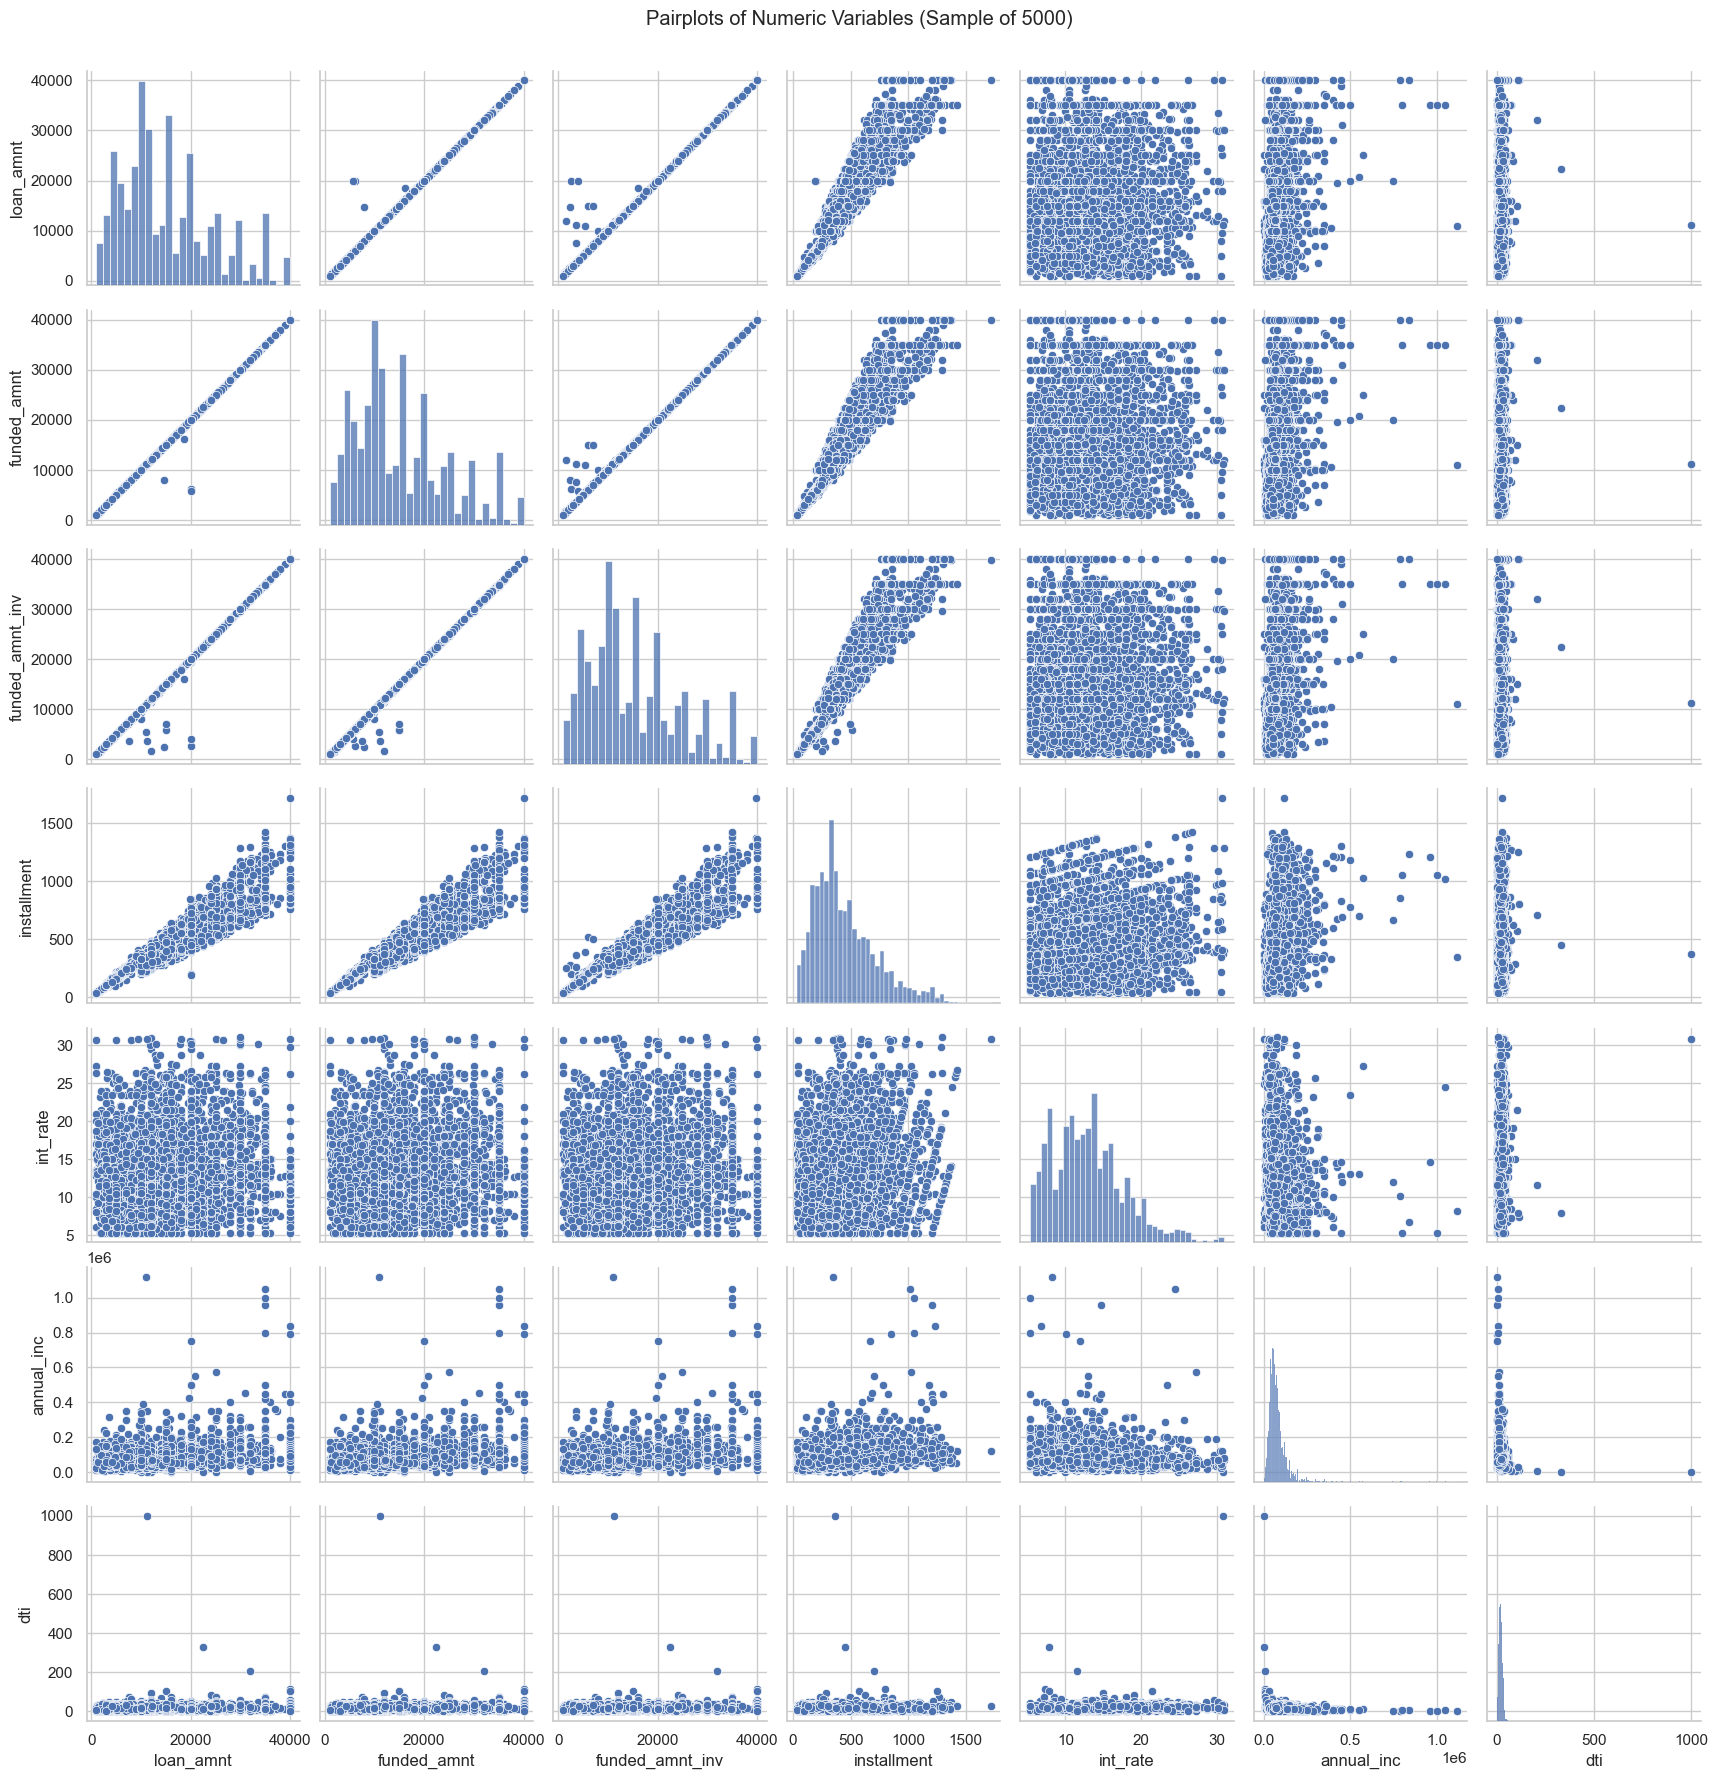

In [16]:
sample_df = df_eda[numeric_cols].sample(5000, random_state=42)  

sns.pairplot(sample_df)
plt.suptitle("Pairplots of Numeric Variables (Sample of 5000)", y=1.02)
plt.show()

# 10) Create a Binary Default Proxy for EDA
# This is NOT the final modeling target. It's used here to compare groups.
# default_flag = 1 if Charged Off or Default else 0


In [17]:
df_eda['default_flag'] = df_eda['loan_status'].apply(lambda x: 1 if 'Default' in str(x) or 'Charged Off' in str(x) else 0)

# 11) Numeric Variables vs Default (Group Comparison)
# Boxplots compare distributions for defaults vs non-defaults.


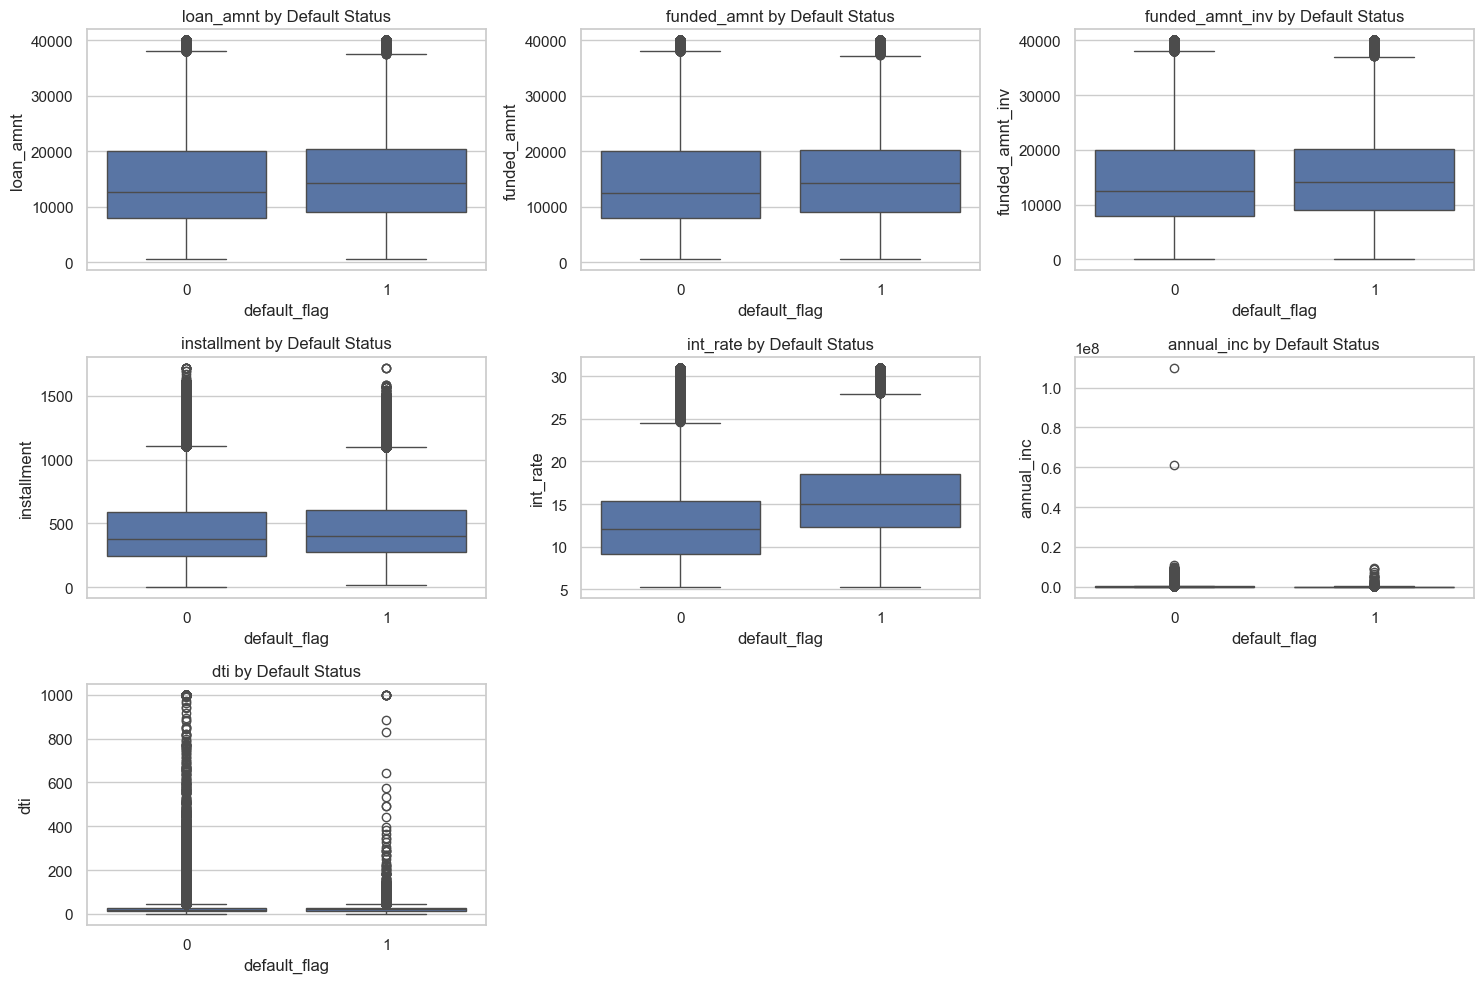

In [18]:
plt.figure(figsize=(15,10))
for i, col in enumerate(numeric_cols):
    plt.subplot(3,3,i+1)
    sns.boxplot(x='default_flag', y=col, data=df_eda)
    plt.title(f"{col} by Default Status")
plt.tight_layout()
plt.show()

# 12) Default Rate by Category (Risk Segmentation)
# Risk teams care about default *rates* (%), not only counts.
# This section computes default rate by grade, sub_grade, term, purpose, etc.


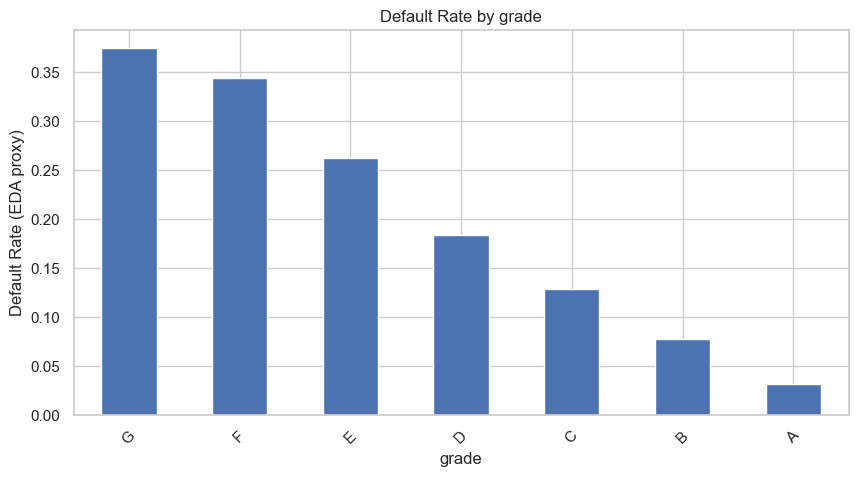

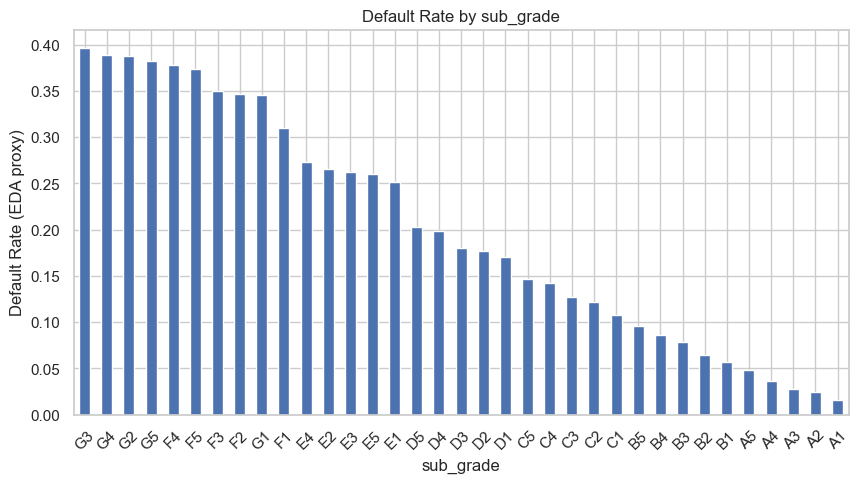

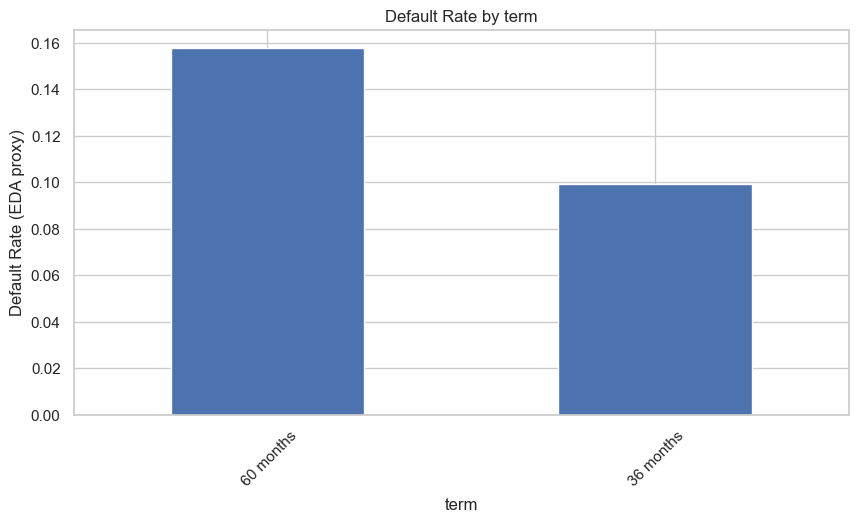

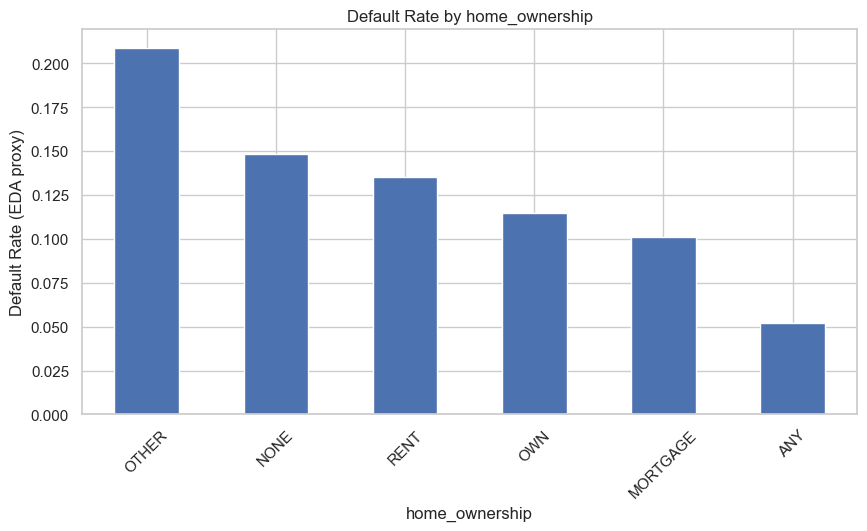

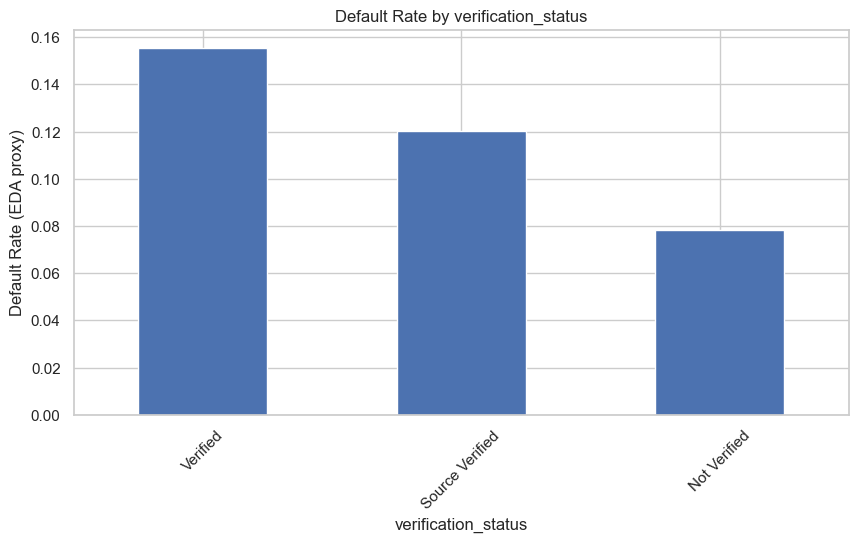

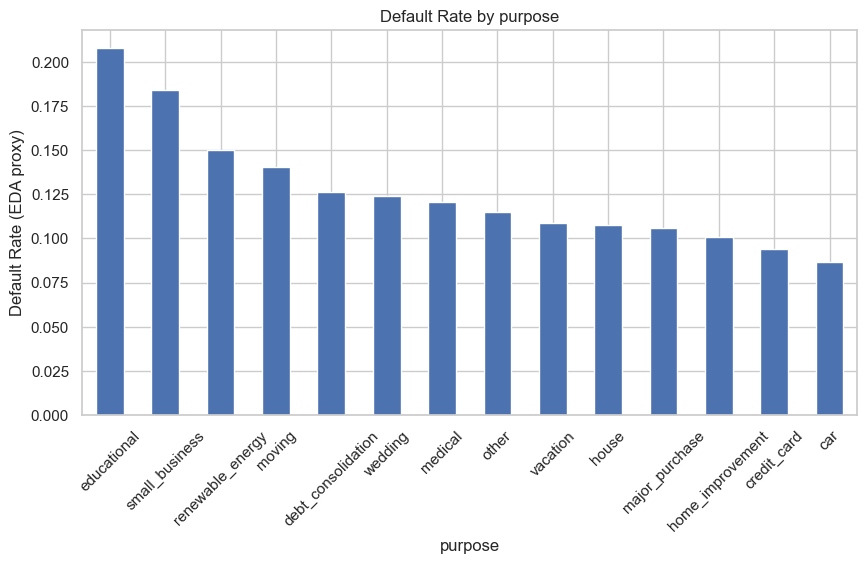

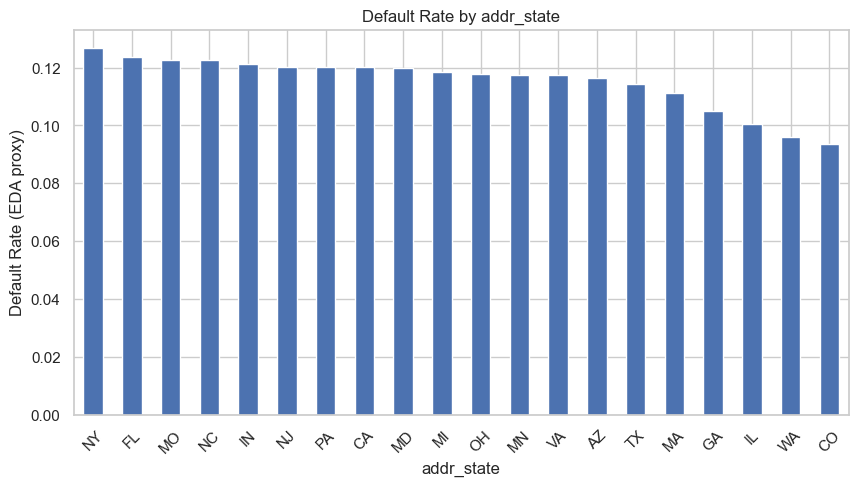

In [19]:
def plot_default_rate(data, category_col, top_n=None):
    """Plot default rate by category. Optionally show only top_n categories."""
    tmp = data.copy()

    if top_n is not None:
        top_cats = tmp[category_col].value_counts().head(top_n).index
        tmp = tmp[tmp[category_col].isin(top_cats)]

    default_rate = (
        tmp.groupby(category_col)['default_flag']
        .mean()
        .sort_values(ascending=False)
    )

    plt.figure(figsize=(10, 5))
    default_rate.plot(kind='bar')
    plt.ylabel("Default Rate (EDA proxy)")
    plt.title(f"Default Rate by {category_col}")
    plt.xticks(rotation=45)
    plt.show()

# Default rate by key categories
plot_default_rate(df_eda, 'grade')
plot_default_rate(df_eda, 'sub_grade')
plot_default_rate(df_eda, 'term')
plot_default_rate(df_eda, 'home_ownership')
plot_default_rate(df_eda, 'verification_status')
plot_default_rate(df_eda, 'purpose')

# For addr_state, show only top 20 states by volume to avoid unreadable plots
plot_default_rate(df_eda, 'addr_state', top_n=20)

# 13) Stacked Counts by Grade (Volume + Risk Context)
# Shows how loan_status volume varies across grades (useful for dashboards).


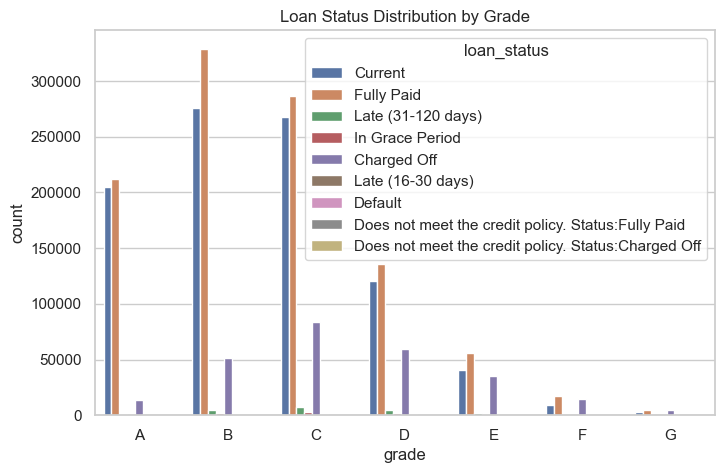

In [20]:
plt.figure(figsize=(8, 5))
sns.countplot(
    data=df_eda,
    x='grade',
    hue='loan_status',
    order=sorted(df_eda['grade'].dropna().unique())
)
plt.title("Loan Status Distribution by Grade")
plt.show()


# 14) Key EDA Takeaways
# 1. There is a monotonic increase in default rate from Grade A to Grade G.
# Grade A ≈ ~3%
# Grade G ≈ ~37%
# The increase is nearly linear and economically meaningful.

# 2.  Defaults increase sharply from 2012–2016, peak around 2015–2016, and decline afterward. There is significant volatility during peak lending years.
# 3. Loan amount–related variables exhibit near-perfect multicollinearity, requiring dimensionality reduction prior to modeling
